In [1]:
import pocketvna
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

Could not load "PocketVnaApi_x64" by systempath. Trying another one "C:\Users\Jacco\Documents\GitHub\bep-jacco-van-leenen\Code\PocketVnaApi_x64.dll"


In [4]:
plt.rcParams['figure.figsize'] = (10,6)
#plt.rcParams['figure.dpi'] = 300

driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')  

# Measuring for the calibration
folder_name = "Calibration"
dt = datetime.datetime.today()
date = "{}-{}-{}".format(dt.day, dt.month, dt.year)
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
file_path = os.path.join(folder_name, date)

START = 10000000
END = 1000000000
STEPS = 1000
freq = np.linspace(START, END, STEPS, dtype=np.uint64)
AVERAGE = 10

def measure_open(name):
    input("Press enter to to measure the open for both ports")
    s11, s21, s12, s22 = driver.scan(freq, AVERAGE, pocketvna.NetworkParams.S21)
    file_name = file_path + "_" + name
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(file_name, data)

def measure_through(name):
    input("Press enter to to measure the Through for both ports")
    s11, s21, s12, s22 = driver.scan(freq, AVERAGE, pocketvna.NetworkParams.S21)
    file_name = file_path + "_" + name
    print(file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(file_name, data)

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '12xxxEF', 'product': 'PocketVNA', 'vendor': '', 'read': True, 'write': True}


In [5]:
measure_open("trans_open.dat")
measure_through("trans_through.dat") 

Press enter to to measure the open for both ports
Press enter to to measure the Through for both ports
Calibration\24-10-2020_trans_through.dat


Text(0.5, 1.0, 'Uncalibrated Interferometer Measurement')

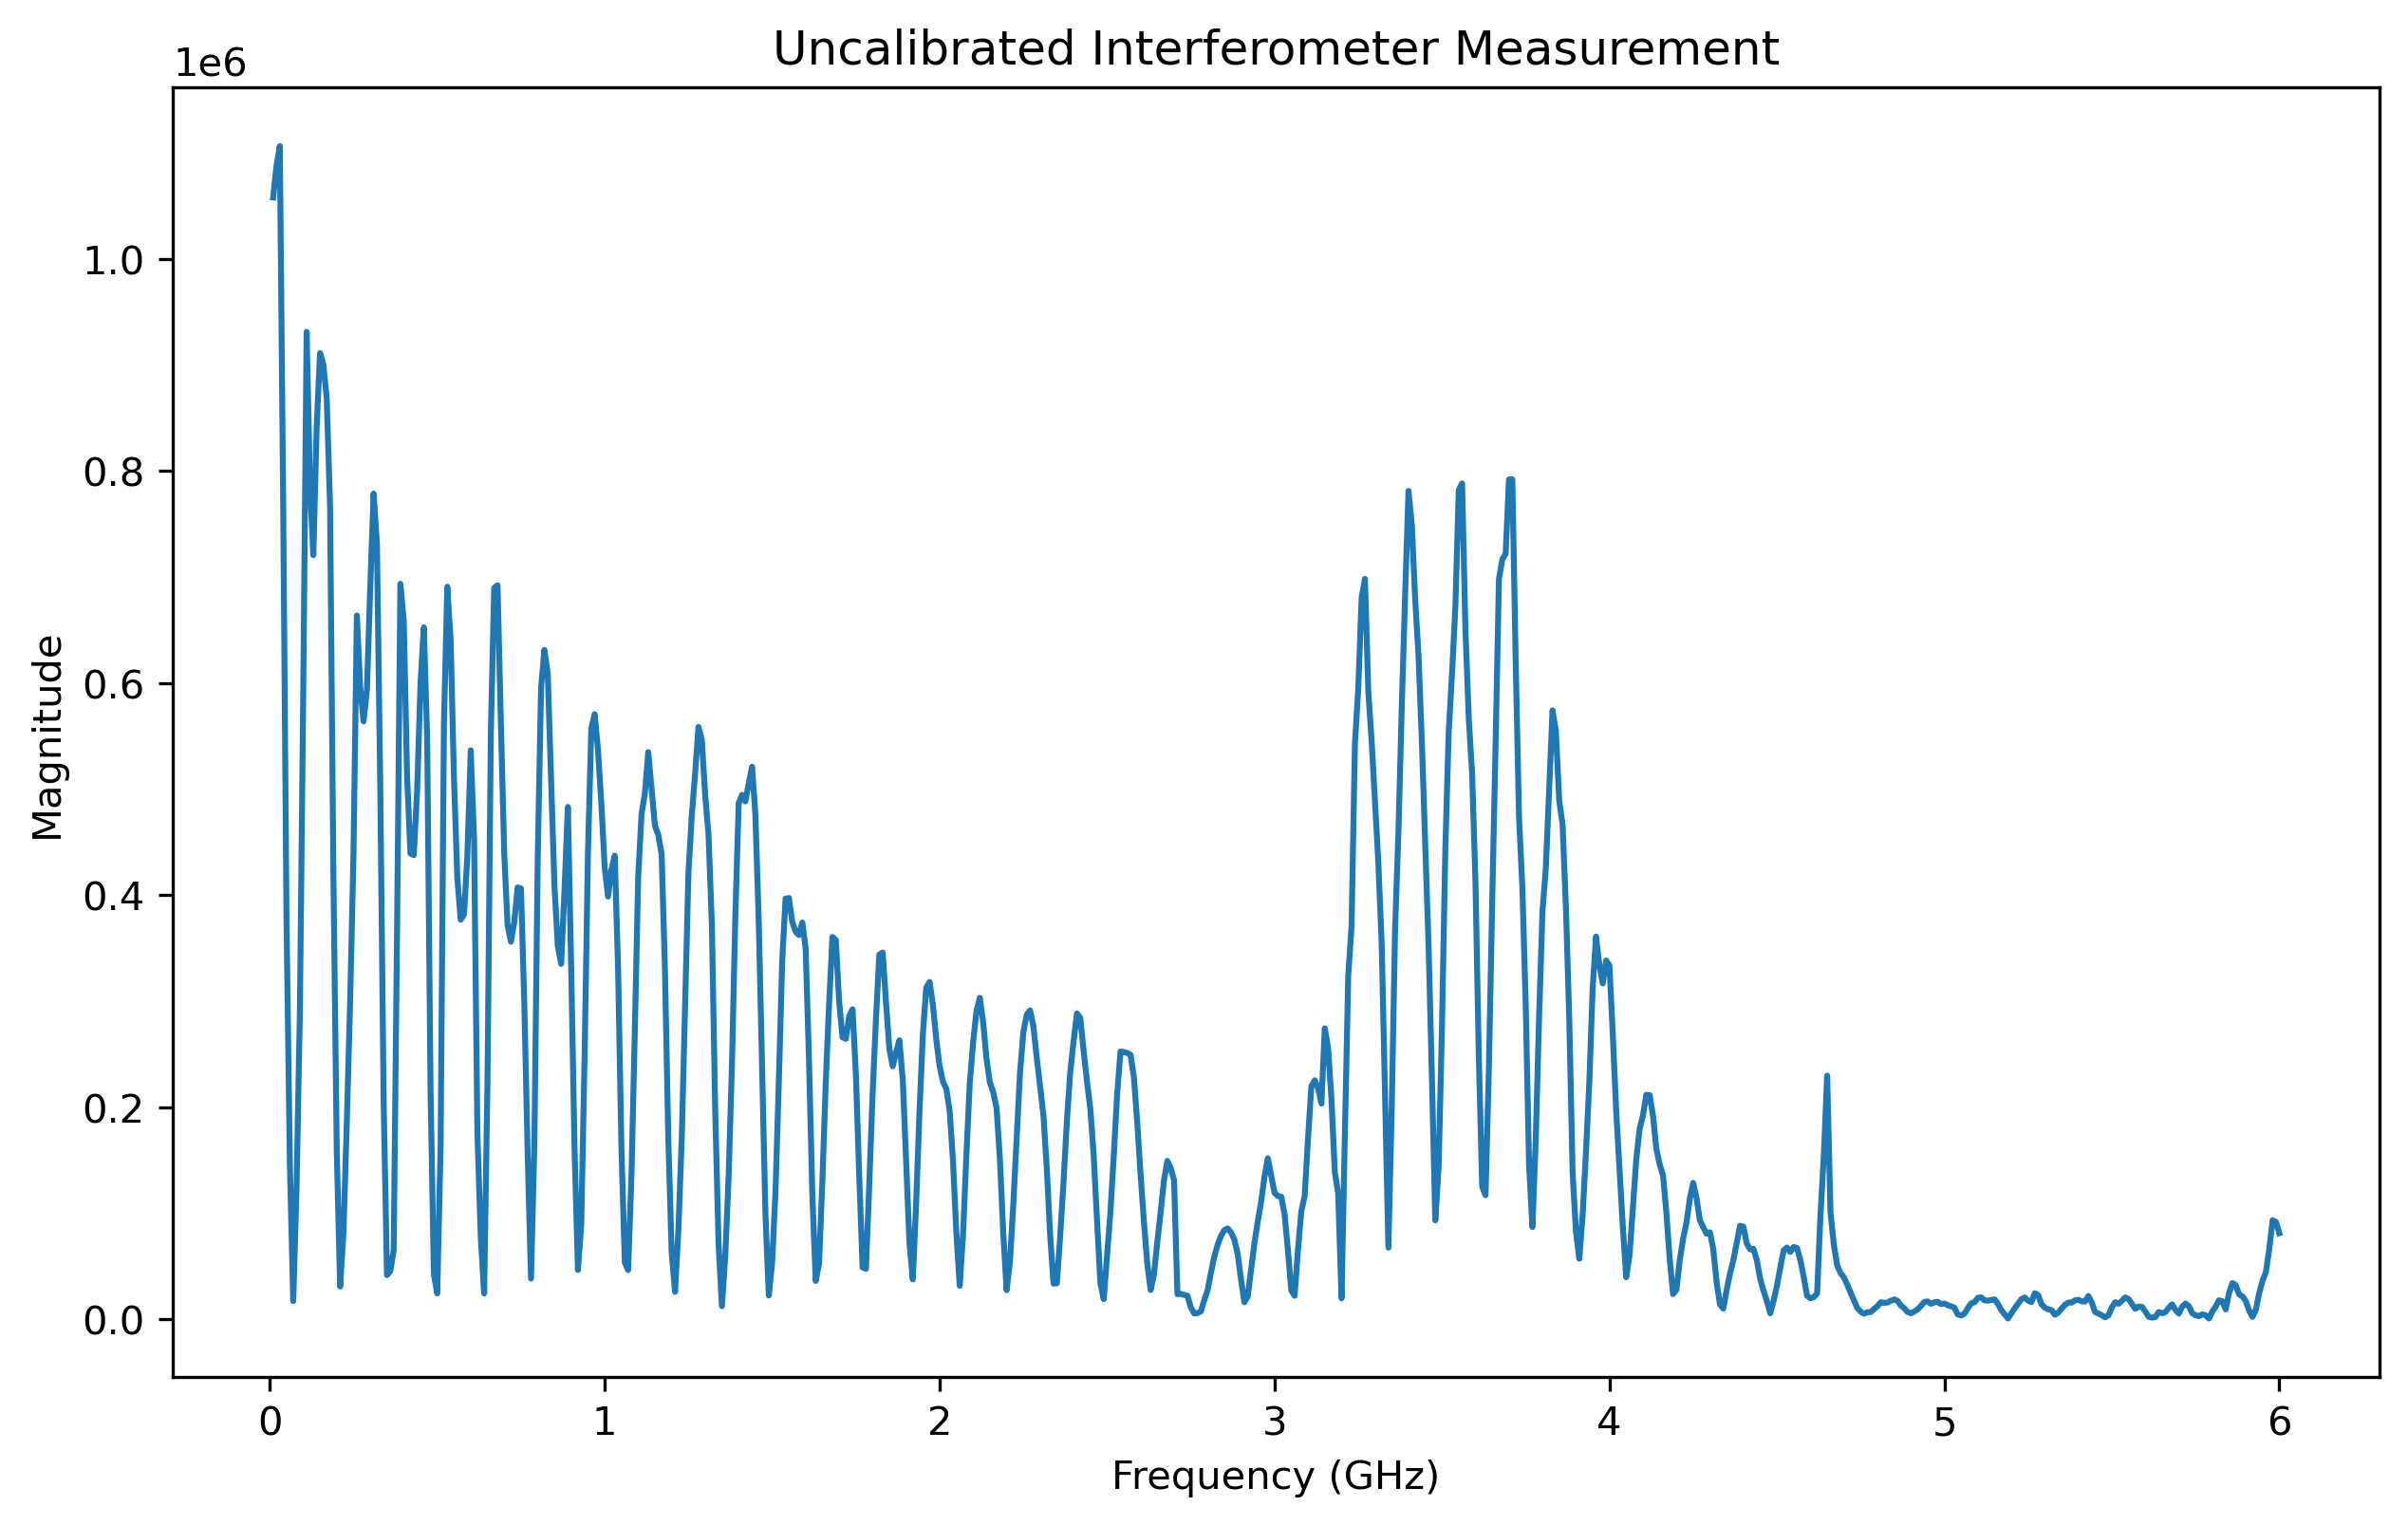

In [56]:
START = 10000000
END = 6000000000
STEPS = 600
freq = np.linspace(START, END, STEPS, dtype=np.uint64)
AVERAGE = 10


s11, s21, s12, s22 = driver.scan(freq, AVERAGE, pocketvna.NetworkParams.S21)

amp_21 = np.sqrt(s21.real**2 + s21.imag**2)
freq = freq / 1000000000

plt.figure(1)
plt.plot(freq, amp_21)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude")
plt.title("Uncalibrated Interferometer Measurement")

Text(0.5, 1.0, 'Calibrated Interferometer Measurement')

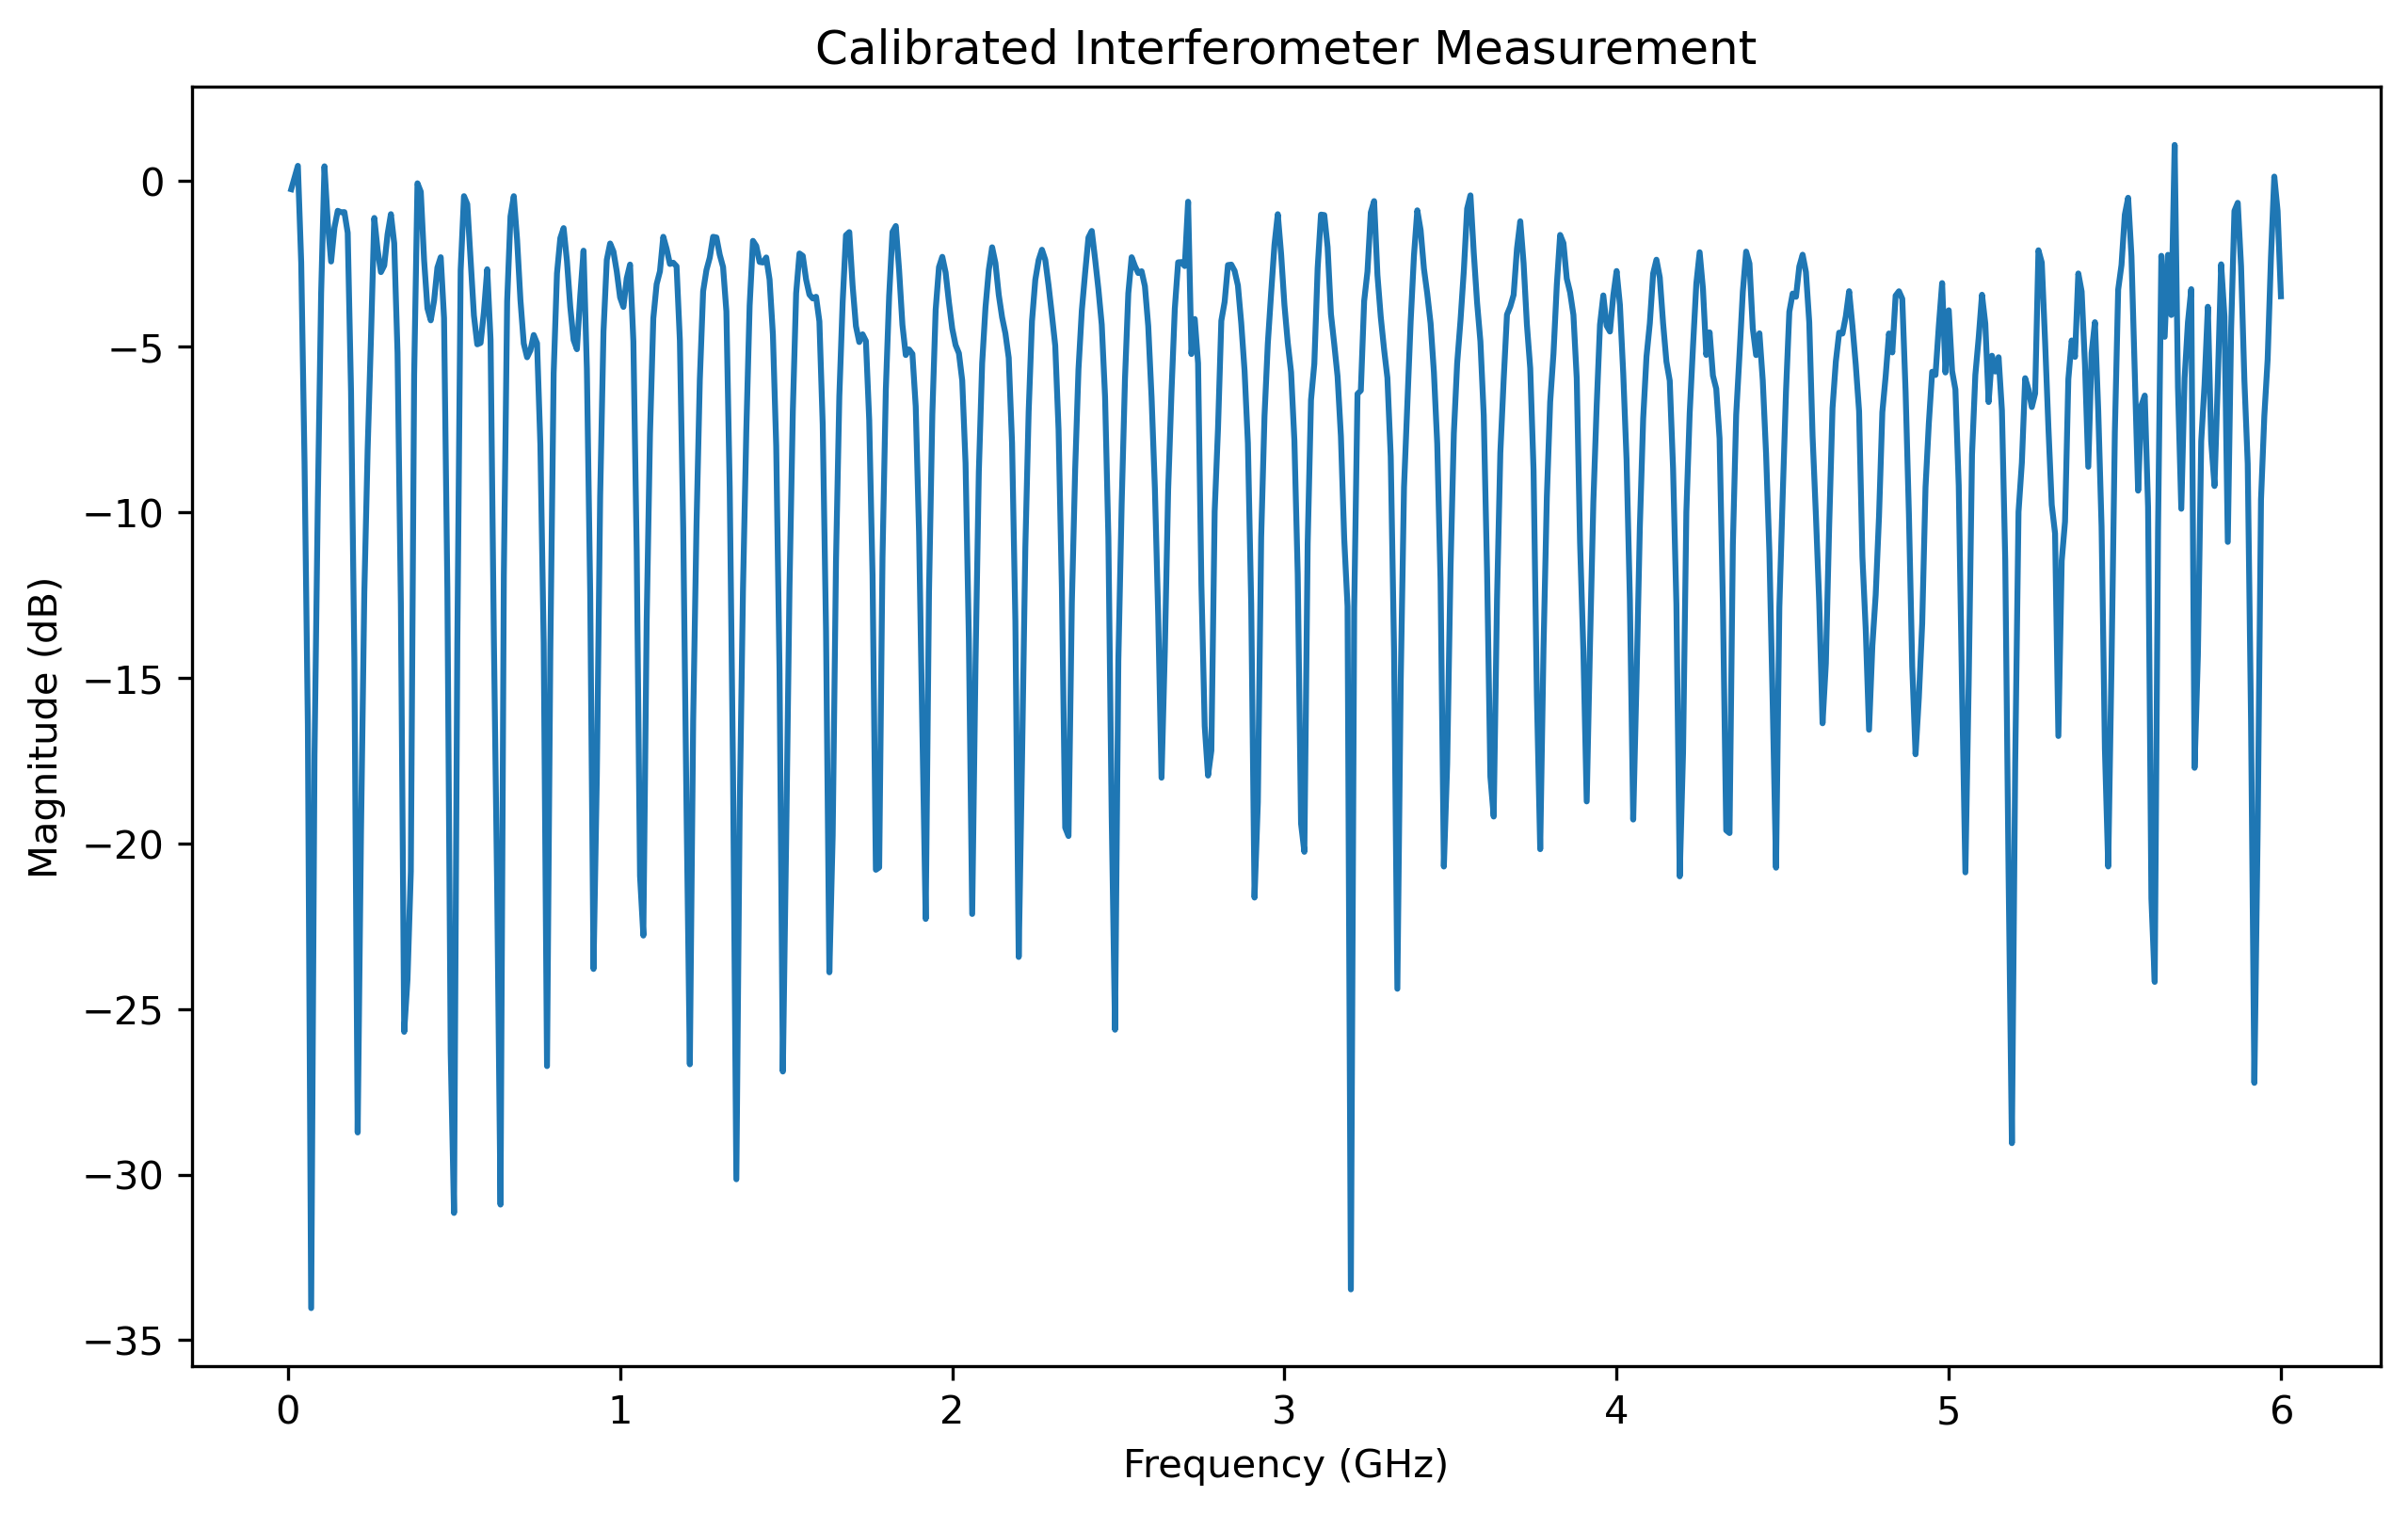

In [58]:
file_name = file_path + "_" + "trans_open.dat"
trans_open = np.loadtxt(file_name)
t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

file_name = file_path + "_" + "trans_through.dat"
trans_through = np.loadtxt(file_name)
t_through = trans_through[:, 0] + trans_through[:, 1] * 1j
    
cal_s21 = (s21 - t_open) / (t_through - t_open)

amp_21 = np.sqrt(cal_s21.real**2 + cal_s21.imag**2)
amp_21 = 20*np.log10(amp_21)

plt.figure(2)
plt.plot(freq, amp_21)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude (dB)")
plt.title("Calibrated Interferometer Measurement")